In [21]:
import pandas as pd
import numpy as np
import networkx as nx
import ast

schools = pd.read_csv('school_genres.csv')
# PageRank for school genres
# first encode in sparse matrix rep
schools.head()

,Unnamed: 0,SCHOOL,GENRES,PLAYLIST_LINK
0,0,Texas A & M University-College Station,"['reddirt', 'outlawcountry', 'texascountry', '...",https://embed.spotify.com/?uri=spotify:playlis...
1,1,The University of Texas at Austin,"['modernrock', 'indiepop', 'pop', 'indiepoptim...",https://embed.spotify.com/?uri=spotify:playlis...
2,2,Ohio State University-Main Campus,"['pop', 'indiepoptimism', 'modernrock', 'indie...",https://embed.spotify.com/?uri=spotify:playlis...
3,3,University of Central Florida,"['pop', 'poprap', 'rap', 'hiphop', 'electrohou...",https://embed.spotify.com/?uri=spotify:playlis...
4,4,Arizona State University-Tempe,"['edm', 'electrohouse', 'pop', 'electronictrap...",https://embed.spotify.com/?uri=spotify:playlis...


In [49]:
co = schools[schools['SCHOOL'].str.contains('Colorado')]
for idx,row in co.iterrows():
    ranking = ast.literal_eval(row['GENRES'])[:5]
    print(row['SCHOOL'])
    print(ranking)

University of Colorado Boulder
['edm', 'electronictrap', 'electrohouse', 'brostep', 'indiepoptimism']
Colorado State University-Fort Collins
['edm', 'modernrock', 'indiepoptimism', 'electrohouse', 'electronictrap']
University of Colorado Denver/Anschutz Medical Campus
['edm', 'electrohouse', 'electronictrap', 'indiepoptimism', 'brostep']
University of Colorado Colorado Springs
['edm', 'indiepoptimism', 'electronictrap', 'electrohouse', 'pop']
University of Northern Colorado
['indiepoptimism', 'modernrock', 'edm', 'electronictrap', 'electrohouse']
Colorado Mesa University
['pop', 'edm', 'poprap', 'indiepoptimism', 'electrohouse']
Colorado School of Mines
['indiepoptimism', 'modernrock', 'indiepop', 'edm', 'indietronica']
Colorado Christian University
['anthemworship', 'indiecoustica', 'ccm', 'worship', 'christianuplift']


In [24]:
#
# Create graph for SpringRank
#

SRG = nx.DiGraph()
added_nodes = set({})
node_score = {}
for idx, row in schools.iterrows():
    ranking = ast.literal_eval(row['GENRES'])[:10]
    rank_set = set(ranking)
    for i in range(len(ranking)):
        new_top = ranking[i]
        if new_top == 'pinoyindie':
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(row['SCHOOL'])
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        try:
            node_score[new_top][len(ranking)-i]  += 1
        except:
            try:
                node_score[new_top][len(ranking)-i] = 1
            except:
                node_score[new_top] = {}
                node_score[new_top][len(ranking)-i] = 1
        if new_top not in added_nodes:
            G.add_node(new_top)
        rank_set.remove(new_top)
        edges = [(new_top, lower_node) for lower_node in rank_set]
        for e,v in edges:
            if SRG.has_edge(e,v):
                SRG[e][v]['weight'] += 1
            else:
                SRG.add_edge(e,v, weight = 1)
            
        # Useful if you only need a small sample (for testing mainly)
#     if idx == 10:
#         break

['reddirt', 'outlawcountry', 'texascountry', 'anthemworship', 'indiecoustica', 'rootsamericana', 'ccm', 'countryroad', 'moderncountryrock', 'contemporarycountry']
['modernrock', 'indiepop', 'pop', 'indiepoptimism', 'alternativerb', 'indietronica', 'electropop', 'poprap', 'indiegaragerock', 'rap']
['pop', 'indiepoptimism', 'modernrock', 'indiepop', 'poprap', 'electropop', 'edm', 'electrohouse', 'dancepop', 'rap']
['pop', 'poprap', 'rap', 'hiphop', 'electrohouse', 'electronictrap', 'brostep', 'edm', 'undergroundhiphop', 'modernrock']
['edm', 'electrohouse', 'pop', 'electronictrap', 'brostep', 'poprap', 'rap', 'undergroundhiphop', 'hiphop', 'indiepoptimism']
['pop', 'modernrock', 'indiepoptimism', 'indiepop', 'poprap', 'edm', 'electrohouse', 'indietronica', 'electronictrap', 'hiphop']
['indiepoptimism', 'pop', 'electropop', 'modernrock', 'poprap', 'edm', 'indiepop', 'dancepop', 'vaporsoul', 'indierb']
['alternativerb', 'pop', 'indierb', 'edm', 'electrohouse', 'popedm', 'electronictrap', '

['rap', 'poprap', 'southernhiphop', 'hiphop', 'undergroundhiphop', 'vaportrap', 'pop', 'melodicrap', 'nycrap', 'gangsterrap']
['rap', 'undergroundhiphop', 'edm', 'electrohouse', 'poprap', 'brostep', 'electronictrap', 'hiphop', 'pop', 'indiegaragerock']
['contemporarycountry', 'countryroad', 'moderncountryrock', 'country', 'countrypop', 'poprap', 'pop', 'rap', 'indiepoptimism', 'indiepoprap']
['pop', 'poprap', 'rap', 'contemporarycountry', 'deeppoprb', 'countryroad', 'dancehall', 'moderncountryrock', 'countrypop', 'hiphop']
['reddirt', 'outlawcountry', 'texascountry', 'pop', 'ccm', 'anthemworship', 'indiepoptimism', 'contemporarycountry', 'worship', 'countryroad']
['contemporarycountry', 'countryroad', 'moderncountryrock', 'country', 'countrypop', 'metalcore', 'melodicmetalcore', 'screamo', 'poppunk', 'outlawcountry']
['poprap', 'pop', 'rap', 'hiphop', 'undergroundhiphop', 'southernhiphop', 'brostep', 'electrohouse', 'electronictrap', 'edm']
['rap', 'pop', 'poprap', 'hiphop', 'southernh

['jawaiian', 'polynesianpop', 'hawaiian', 'rb', 'reggaerock', 'urbancontemporary', 'dancepop', 'deeppoprb', 'hippop', 'indierb']
['ccm', 'anthemworship', 'worldworship', 'worship', 'christianpop', 'deepccm', 'christianmusic', 'indiecoustica', 'christianuplift', 'christianalternativerock']
['indiecoustica', 'anthemworship', 'ccm', 'christianuplift', 'worship', 'rootsworship', 'christianpop', 'indiepoptimism', 'worldworship', 'modernrock']
['rap', 'poprap', 'alternativerb', 'pop', 'deeppoprb', 'rb', 'southernhiphop', 'urbancontemporary', 'hiphop', 'hippop']
['ccm', 'anthemworship', 'worldworship', 'worship', 'christianmusic', 'christianpop', 'christianalternativerock', 'indiecoustica', 'deepccm', 'indiepoptimism']
['artpop', 'kindie', 'koreanpop', 'koreanrb', 'khop', 'kpop', 'escaperoom', 'alternativerb', 'indiesoul', 'electropop']
['reggaeton', 'reggaetonflow', 'tropical', 'latin', 'latinhiphop', 'traplatino', 'latinpop', 'puertoricanpop', 'latinarenapop', 'mexicanpop']
['anthemworship'

In [62]:
#
# Create graph for PageRank
#

PRG = nx.DiGraph()
added_nodes = set({})
node_score = {}
for idx, row in co.iterrows():
    if idx == 176:
        break
    print(idx)
    ranking = ast.literal_eval(row['GENRES'])[:5]
    rank_set = set(ranking)
    print(ranking)
    for i in range(len(ranking)):
        new_top = ranking[i]
        if new_top == 'pinoyindie':
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(row['SCHOOL'])
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        try:
            node_score[new_top][len(ranking)-i]  += 1
        except:
            try:
                node_score[new_top][len(ranking)-i] = 1
            except:
                node_score[new_top] = {}
                node_score[new_top][len(ranking)-i] = 1
        if new_top not in added_nodes:
            G.add_node(new_top)
        rank_set.remove(new_top)
        # only reverse the direction of the edge for PageRank, otherwise graph is the same
        edges = [(lower_node, new_top) for lower_node in rank_set]
        for e,v in edges:
            if PRG.has_edge(e,v):
                PRG[e][v]['weight'] += 1
            else:
                PRG.add_edge(e,v, weight = 1)
    


35
['edm', 'electronictrap', 'electrohouse', 'brostep', 'indiepoptimism']
36
['edm', 'modernrock', 'indiepoptimism', 'electrohouse', 'electronictrap']


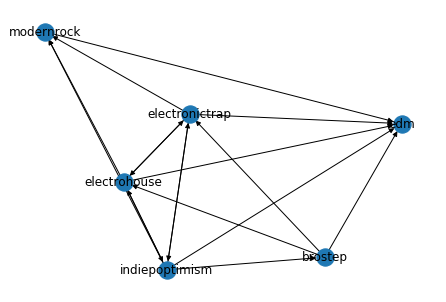

In [65]:
import matplotlib.pyplot as plt

nx.draw(PRG, with_labels=True)
plt.savefig('example_pr.png')

In [67]:
pr = pd.Series(nx.pagerank(PRG))
pr

indiepoptimism    0.124022
edm               0.354597
electrohouse      0.143493
brostep           0.092804
electronictrap    0.143493
modernrock        0.141592
dtype: float64

In [25]:
adj = nx.to_numpy_matrix(SRG)
nodes=list(SRG.nodes())

adj

matrix([[ 0., 27., 35., ...,  0.,  0.,  0.],
        [ 2.,  0., 14., ...,  1.,  0.,  0.],
        [12., 19.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
import SpringRank_tools as sr
import tools as tl
network = 'schools'
alpha=0.
l0=1.
l1=1.
'''
Extracts SpringRank
'''
rank=sr.SpringRank(adj,alpha=alpha,l0=l0,l1=l1)

rank=tl.shift_rank(rank)   # (optional) shifts so that the min is in zero and the others are positive

'''
Order results so that the first node is the highest-ranked one
'''
X=[(nodes[i],rank[i]) for i in range(SRG.number_of_nodes())]
X= sorted(X, key=lambda tup: tup[1],reverse=True)
'''
Prints results
'''
print('SpringRank scores:')
for i in range(100):
    print("{} {}\n".format(X[i][0],X[i][1]))
    print(X[i][0],X[i][1], node_score[X[i][0]])


SpringRank scores:
opm 2.7300489480143932

opm 2.7300489480143932 {10: 2}
arabpop 2.570443637358184

arabpop 2.570443637358184 {10: 1, 9: 1}
pinoyindie 2.5300486183514663

pinoyindie 2.5300486183514663 {9: 2}
lebanesepop 2.370443307695189

lebanesepop 2.370443307695189 {9: 1, 8: 1}
jewishpop 2.3466733503532633

jewishpop 2.3466733503532633 {8: 1, 10: 1, 7: 1}
pinoyrock 2.3300482886884524

pinoyrock 2.3300482886884524 {8: 2}
deepindianpop 2.2045381245290416

deepindianpop 2.2045381245290416 {9: 1}
dabke 2.1704429780321806

dabke 2.1704429780321806 {8: 1, 7: 1}
classicopm 2.130047959025473

classicopm 2.130047959025473 {7: 2}
calirap 2.1028227875495356

calirap 2.1028227875495356 {6: 7, 7: 6, 5: 6, 1: 2, 2: 5, 10: 60, 9: 10, 8: 5, 3: 2, 4: 1}
reddirt 2.0692907701069014

reddirt 2.0692907701069014 {10: 21, 2: 4, 7: 2, 1: 2, 4: 7, 3: 2, 8: 1, 9: 18, 6: 3, 5: 4}
jawaiian 2.0191692776469043

jawaiian 2.0191692776469043 {7: 2, 1: 1, 6: 2, 5: 4, 10: 6, 4: 1}
outlawcountry 2.0097707609079

outl

In [38]:
top_spring_genres = X[:75]
top_spring_genres = [g for g,s in top_spring_genres]

In [39]:
pr = pd.Series(nx.pagerank(PRG))
pr.nlargest(75).to_csv('top_school_genres_reverse.csv')

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [40]:
pr.nlargest(75)

pop                    0.062252
poprap                 0.053595
rap                    0.050236
contemporarycountry    0.029330
indiepoptimism         0.027956
                         ...   
motown                 0.002697
alternativeemo         0.002499
rootsamericana         0.002488
russiandancepop        0.002458
jewishpop              0.002453
Length: 75, dtype: float64

In [41]:
scores = pd.DataFrame(node_score)

In [42]:
scores

,reddirt,outlawcountry,texascountry,anthemworship,indiecoustica,rootsamericana,ccm,countryroad,moderncountryrock,contemporarycountry,...,praise,naijaworship,contemporaryjazz,jazzfusion,contemporarypostbop,neorb,mexicanpop,christianindie,trapespanol,gospelrb
10,21,18,NaN,33,11,NaN,12,NaN,NaN,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,3.0,7,7,NaN,10,8.0,18.0,7,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,2,2,NaN,14,6,2.0,2,16.0,25.0,23,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,3.0,4,6,3.0,8,7.0,5.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN
4,7,1,4.0,2,7,NaN,16,10.0,9.0,4,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,2,5,7.0,10,19,2.0,1,21.0,7.0,8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,1,38.0,4,5,NaN,10,17.0,36.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,18,22,NaN,20,3,NaN,31,49.0,8.0,10,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,6,3.0,2,16,NaN,4,20.0,8.0,13,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,4,10,NaN,7,8,11.0,3,9.0,22.0,12,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [43]:
# give weight to ranking of each genres, 10*number1 count, 9 * number2 count, etc
for i in range(1,11):
    print(i)
    scores.loc[i] = scores.loc[i]*(11-i)

1
2
3
4
5
6
7
8
9
10


In [46]:
scored_set = set(scores.sum().nlargest(75).index.values)
pr_set = set(pr.nlargest(75).index.values)
sr_set = set(top_spring_genres)

In [47]:
print(scored_set.difference(pr_set))
print(pr_set.difference(scored_set))
print(len(scored_set & pr_set))


print(scored_set.difference(sr_set))
print(sr_set.difference(scored_set))
print(len(scored_set & sr_set))

print(pr_set.difference(sr_set))
print(sr_set.difference(pr_set))
print(len(pr_set & sr_set))

{'indiepoprap', 'soul', 'christianuplift', 'vaportwitch', 'chamberpop', 'deepccm', 'indierock', 'christianalternativerock', 'melodicrap', 'countryrock', 'vaporsoul', 'reggaerock', 'emo', 'traplatino', 'atlhiphop', 'zapstep', 'gangsterrap', 'dirtysouthrap', 'rootsworship'}
{'regionalmexican', 'classicsoul', 'lds', 'pinoyindie', 'jawaiian', 'arabpop', 'reggaetonflow', 'ldsyouth', 'dominicanpop', 'reggaeton', 'polynesianpop', 'russiandancepop', 'motown', 'dancehall', 'soca', 'detroittrap', 'jewishpop', 'filmi', 'opm'}
56
{'indierb', 'countrypop', 'christianmusic', 'alternativeemo', 'soul', 'alternativerb', 'indiepoprap', 'deeppoprb', 'brostep', 'christianuplift', 'escaperoom', 'latin', 'vaportwitch', 'worldworship', 'urbancontemporary', 'chamberpop', 'indiefolk', 'electropop', 'deepccm', 'indierock', 'christianalternativerock', 'indiepop', 'melodicrap', 'undergroundhiphop', 'popedm', 'countryrock', 'hiphop', 'vaporsoul', 'indiecoustica', 'stompandholler', 'reggaerock', 'rootsworship', 'em

In [48]:
scores.sum().nlargest(75).to_csv('top_genres_scored.csv')

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [68]:
school_genres.head()

NameError: name 'school_genres' is not defined

In [69]:
schools = pd.read_csv('school_genres.csv')
# PageRank for school genres
# first encode in sparse matrix rep
schools.head()

,Unnamed: 0,SCHOOL,GENRES,PLAYLIST_LINK
0,0,Texas A & M University-College Station,"['reddirt', 'outlawcountry', 'texascountry', '...",https://embed.spotify.com/?uri=spotify:playlis...
1,1,The University of Texas at Austin,"['modernrock', 'indiepop', 'pop', 'indiepoptim...",https://embed.spotify.com/?uri=spotify:playlis...
2,2,Ohio State University-Main Campus,"['pop', 'indiepoptimism', 'modernrock', 'indie...",https://embed.spotify.com/?uri=spotify:playlis...
3,3,University of Central Florida,"['pop', 'poprap', 'rap', 'hiphop', 'electrohou...",https://embed.spotify.com/?uri=spotify:playlis...
4,4,Arizona State University-Tempe,"['edm', 'electrohouse', 'pop', 'electronictrap...",https://embed.spotify.com/?uri=spotify:playlis...


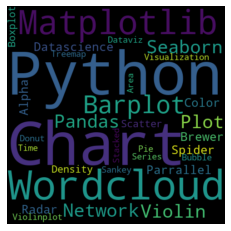

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
text = 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [78]:
schools['SCHOOL'].sample(10)

216        University of North Carolina at Greensboro
97               University of Oklahoma-Norman Campus
442               Kutztown University of Pennsylvania
60                            Northeastern University
193                 Washington University in St Louis
622    Inter American University of Puerto Rico-Metro
509                         University of the Pacific
576                        Seattle Pacific University
344                       Eastern Kentucky University
208                    University of Minnesota-Duluth
Name: SCHOOL, dtype: object

In [87]:
school_name = ['Dartmouth','UCB','Princeton','CSU']
school_real = ['Dartmouth College','University of Colorado Boulder', 'Colorado State University-Fort Collins','Princeton University']

Dartmouth
Dartmouth College
['indiepoptimism', 'pop', 'modernrock', 'electropop', 'indiefolk', 'indiepop', 'folkpop', 'stompandholler', 'edm', 'popedm']
Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth Dartmouth indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism pop pop pop pop pop pop pop pop pop pop modernrock modernrock modernrock modernrock modernrock modernrock modernrock modernrock modernrock modernrock electropop electropop electropop electropop electropop electropop electropop electropop electropop electropop indiefolk indiefolk indiefolk indiefolk indiefolk indiefolk indiefolk indiefolk indiefolk indiefolk indiepop indiepop indiepop indiepop indiepop indiepop indiepop indiepop indiepop indiepop folkpop folkpop folkpop folkpop folkpop folkpop folkpop folkpop folkpop folkpop stompandholler st

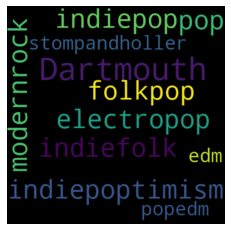

UCB
University of Colorado Boulder
['edm', 'electronictrap', 'electrohouse', 'brostep', 'indiepoptimism', 'vaporsoul', 'vaportwitch', 'electropop', 'modernrock', 'popedm']
UCB UCB UCB UCB UCB UCB UCB UCB UCB UCB UCB UCB UCB UCB UCB edm edm edm edm edm edm edm edm edm electronictrap electronictrap electronictrap electronictrap electronictrap electronictrap electronictrap electronictrap electronictrap electrohouse electrohouse electrohouse electrohouse electrohouse electrohouse electrohouse electrohouse electrohouse brostep brostep brostep brostep brostep brostep brostep brostep brostep indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism vaporsoul vaporsoul vaporsoul vaporsoul vaporsoul vaporsoul vaporsoul vaporsoul vaporsoul vaportwitch vaportwitch vaportwitch vaportwitch vaportwitch vaportwitch vaportwitch vaportwitch vaportwitch electropop electropop electropop electropop electropop electropop electropo

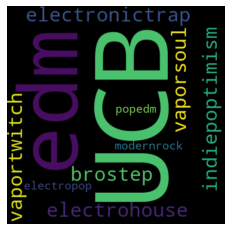

Princeton
Colorado State University-Fort Collins
['edm', 'modernrock', 'indiepoptimism', 'electrohouse', 'electronictrap', 'electropop', 'brostep', 'vaporsoul', 'vaportwitch', 'pop']
Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton Princeton edm edm edm edm edm edm edm edm modernrock modernrock modernrock modernrock modernrock modernrock modernrock modernrock indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism electrohouse electrohouse electrohouse electrohouse electrohouse electrohouse electrohouse electrohouse electronictrap electronictrap electronictrap electronictrap electronictrap electronictrap electronictrap electronictrap electropop electropop electropop electropop electropop electropop electropop electropop brostep brostep brostep brostep brostep brostep brostep brostep vaporsoul vaporsoul vaporsoul vaporsoul vaporsoul v

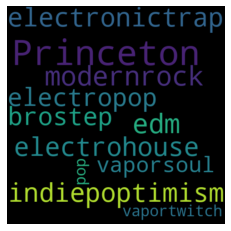

CSU
Princeton University
['modernrock', 'indiepop', 'folkpop', 'indiefolk', 'electropop', 'alternativerb', 'artpop', 'chamberpop', 'indiepoptimism', 'indierock']
CSU CSU CSU CSU CSU CSU CSU CSU CSU CSU CSU CSU CSU CSU CSU modernrock modernrock modernrock modernrock modernrock modernrock modernrock indiepop indiepop indiepop indiepop indiepop indiepop indiepop folkpop folkpop folkpop folkpop folkpop folkpop folkpop indiefolk indiefolk indiefolk indiefolk indiefolk indiefolk indiefolk electropop electropop electropop electropop electropop electropop electropop alternativerb alternativerb alternativerb alternativerb alternativerb alternativerb alternativerb artpop artpop artpop artpop artpop artpop artpop chamberpop chamberpop chamberpop chamberpop chamberpop chamberpop chamberpop indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indiepoptimism indierock indierock indierock indierock indierock indierock indierock


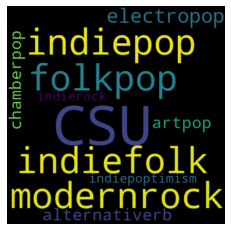

In [104]:
for i in range(4):
    print(school_name[i])
    print(school_real[i])
    text = 15*" {} ".format(school_name[i])
    row = schools[schools['SCHOOL']==school_real[i]]
    top_10 = ast.literal_eval(row['GENRES'].values[0])[:10]
    print(top_10)
    for j in range(10):
        text += (10-i)*" {} ".format(top_10[j])
    text = text.replace('  ',' ')
    text = text.strip()
    print(text)
    wordcloud = WordCloud(width=480, height=480, margin=0,collocations=False).generate(text)
 
# Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.savefig(school_name[i]+'.png')
    plt.show()

In [89]:
row = schools[schools['SCHOOL']==school_real[0]]

In [92]:
row.index[0]

444

In [83]:
school_real[0]

'Dartmouth University'

In [95]:
schools[schools['SCHOOL'].str.contains('Dartmouth College')]['GENRES'].values

array(["['indiepoptimism', 'pop', 'modernrock', 'electropop', 'indiefolk', 'indiepop', 'folkpop', 'stompandholler', 'edm', 'popedm', 'dancepop', 'indietronica', 'tropicalhouse', 'chamberpop', 'electrohouse', 'newamericana', 'vaporsoul', 'indieelectropop', 'indiecoustica', 'vaportwitch', 'alternativerb', 'neomellow', 'poprap', 'indierb', 'bigroom', 'indierock', 'electronictrap', 'indieanthemfolk', 'artpop', 'hopebeat', 'nycpop', 'progressiveelectrohouse', 'rap', 'deepbigroom', 'deepnewamericana', 'freakfolk', 'hiphop', 'postteenpop', 'progressivehouse', 'shimmerpop', 'brostep', 'deeptropicalhouse', 'escaperoom', 'lapop', 'metropopolis', 'poprock', 'undergroundhiphop', 'acousticpop', 'brooklynindie', 'funk', 'hippop', 'indiepoprap', 'neosoul', 'noisepop', 'pianorock', 'rb', 'retrosoul', 'southernhiphop', 'urbancontemporary']"],
      dtype=object)